In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv(r'C:\Users\visha\OneDrive\Scaler Academy\Datasets\cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [11]:
x = df.model.values
y = df.selling_price.values

In [12]:
x

array([-1.12568266, -0.3332271 , -0.78980745, ..., -0.4486842 ,
        0.32802721,  1.03651397])

In [13]:
y

array([-1.11104589, -0.22394353, -0.91505816, ..., -0.48182212,
        1.16860087,  1.11702515])

In [14]:
#we got the error because it is asking for 2d array but we are giving 1d array
linear = LinearRegression()
linear.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.12568266 -0.3332271  -0.78980745 ... -0.4486842   0.32802721
  1.03651397].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
x = x.reshape(x.size,1)
y = y.reshape(y.size,1)

In [16]:
linear.fit(x,y)

LinearRegression()

In [17]:
b = linear.intercept_
w = linear.coef_
print(w,b)

[[0.96505112]] [-1.18731936e-16]


In [18]:
y_hat= linear.predict(x)
linear.score(x,y)

0.9313236629576508

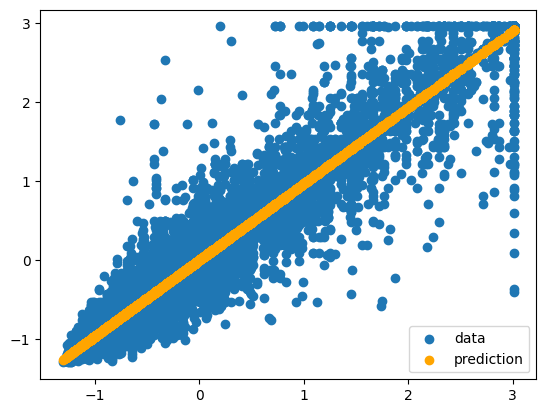

In [19]:
fig = plt.figure()
plt.scatter(x,y,label='data')
plt.scatter(x,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Build model using all the columns

In [20]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [22]:
from sklearn.linear_model import LinearRegression
mld1 = LinearRegression()
mld1.fit(x_train, y_train)

LinearRegression()

In [23]:
print(mld1.intercept_)
print(mld1.coef_)

-0.0012230882390132385
[-6.10815805e+10 -1.68609619e-02 -4.93460787e-02  3.04310066e-02
  2.81716044e-02 -6.10815805e+10  6.05538409e-02  7.89499823e-01
 -1.75912819e-02 -2.91802526e-03  1.41370319e-02  1.29601367e-02
  2.00019447e-03 -2.35503123e-02 -1.32211909e-02 -2.86087644e-02
 -3.60378969e-02]


In [24]:
#check how good is your model using r2. it called a good model if it is closer to 1.
print("Train Score : ",mld1.score(x_train, y_train)) #Train R2 Score
print("Test Score : ", mld1.score(x_test, y_test))   #Test R2 Score

Train Score :  0.9409652626214199
Test Score :  0.9468679437299327


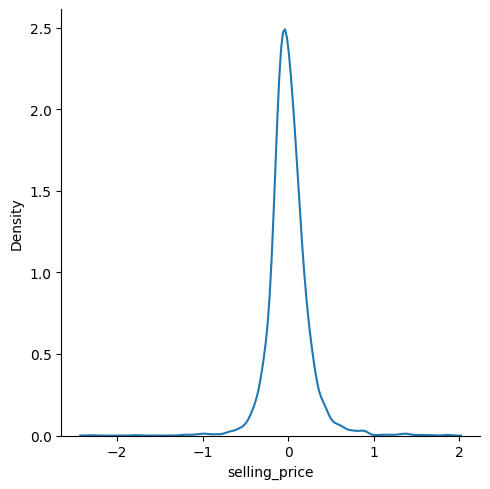

In [25]:
y_hat = mld1.predict(x_test)
error = y_test - y_hat
sns.displot(error, kind = 'kde')

In [26]:
#Another way to determine how good is your model is by finding the error. it should be as small as it can.
np.mean(error)

0.005699795987965588

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

0.054180618085069104

Note - learn about the errors, score, and statmodel